# 1. 의사결정나무 개념

1.1. 의사결정나무의 장점을 서술하시오.

답) 직관적으로 이애하기 쉽습니다.

1.2. 의사결정나무의 단점을 서술하시오.

답)  과적합으로 테스트 세트에서의 정확도가 떨어질수 있습니다.

1.3. 트리의 최대 깊이(max_depth)가 커질때 우려되는 문제점을 서술하시오.

답) overfitting이 되어서 테스트세트 에서의 정확도가 떨어질 수 있습니다

# 2. 지니불순도와 엔트로피

2.1.맨 위쪽 부모 노드의 지니불순도 값을 구하시오.

![](https://images.velog.io/images/sgh9702/post/e82a8da8-5149-48ec-9cbd-85b0fd0b82ec/pic2_1.png)

답 ) 0.666

2.2. 맨 위쪽 부모 노드의 entropy 값을 구하시오.

![](https://images.velog.io/images/sgh9702/post/e48a9c16-01a1-4994-af60-52a1a36404c3/pic2_2.png)

답 ) ![](https://images.velog.io/images/sgh9702/post/ed41d81d-0f31-4eab-8a8f-a31f2bdf8862/1.PNG)

# 3. 실습

boston housing.csv에 의사결정나무를 활용

In [ ]:
import pandas as pd
df = pd.read_csv("boston_housing.csv")

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data = df.copy().loc[:, ['crim', 'chas', 'tax', 'lstat', 'medv'] ]

In [ ]:
data

,crim,chas,tax,lstat,medv
0,0.00632,0,296,4.98,24.0
1,0.02731,0,242,9.14,21.6
2,0.02729,0,242,4.03,34.7
3,0.03237,0,222,2.94,33.4
4,0.06905,0,222,5.33,36.2
...,...,...,...,...,...
501,0.06263,0,273,9.67,22.4
502,0.04527,0,273,9.08,20.6
503,0.06076,0,273,5.64,23.9
504,0.10959,0,273,6.48,22.0


3.1. feature와 target 나누시오.
feature들로 이루어진 데이터프레임을 t_features에 저장하고, target으로 이루어진 Series를 t_target에 저장하시오.


t_features = 

t_target = 

In [ ]:
t_features = data.drop(['medv'], axis=1)

In [ ]:
t_target = data['medv']

3.2. sklearn을 활용하여 train셋: test셋 = 8:2 비율로 분리하시오. random_state = 2021로 지정하시오.

train_features, test_features , train_target, test_target에 각 데이터를 저장하시오.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(t_features, t_target,
                                                    test_size=0.2, random_state=2021)
train_features = x_train 
train_target = y_train 
test_features = x_test
test_target = y_test

In [ ]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

404
404
102
102



3.3.
DecisionTreeRegressor 모델(random_state = 2021)을 만들고,
train_features와 train_target을 이용해 모델을 fit하고 이를 tree_fit에 저장하세요


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=2021) 

In [ ]:
tree_fit = dt.fit(train_features, train_target)

### GridSearchCV로 최적 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=2021))


param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['mse', 'mae'] 

param_grid = [{'decisiontreeregressor__max_depth': param_range1,
              'decisiontreeregressor__min_samples_leaf': param_range2,
              'decisiontreeregressor__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, 
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1)

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

28.454197812256172
{'decisiontreeregressor__criterion': 'mse', 'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 20}


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


3.4. 최적의 파라미터로 만든 모델 best_tree에 저장하고,이를 train_features 와 train_target 에 대해 fit 하세요

In [ ]:
best_tree_for_graph = DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=20, random_state = 2021)
best_tree_for_graph.fit(train_features, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=20,
                      random_state=2021)

In [ ]:
y_pred = best_tree_for_graph.predict(test_features)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(test_target, y_pred))
print('MSE: %.3f' % mean_squared_error(test_target,y_pred))

R squared: 0.552
MSE: 28.644


In [ ]:
import numpy as np
feature_names = train_features.columns.tolist()

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import os

dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)


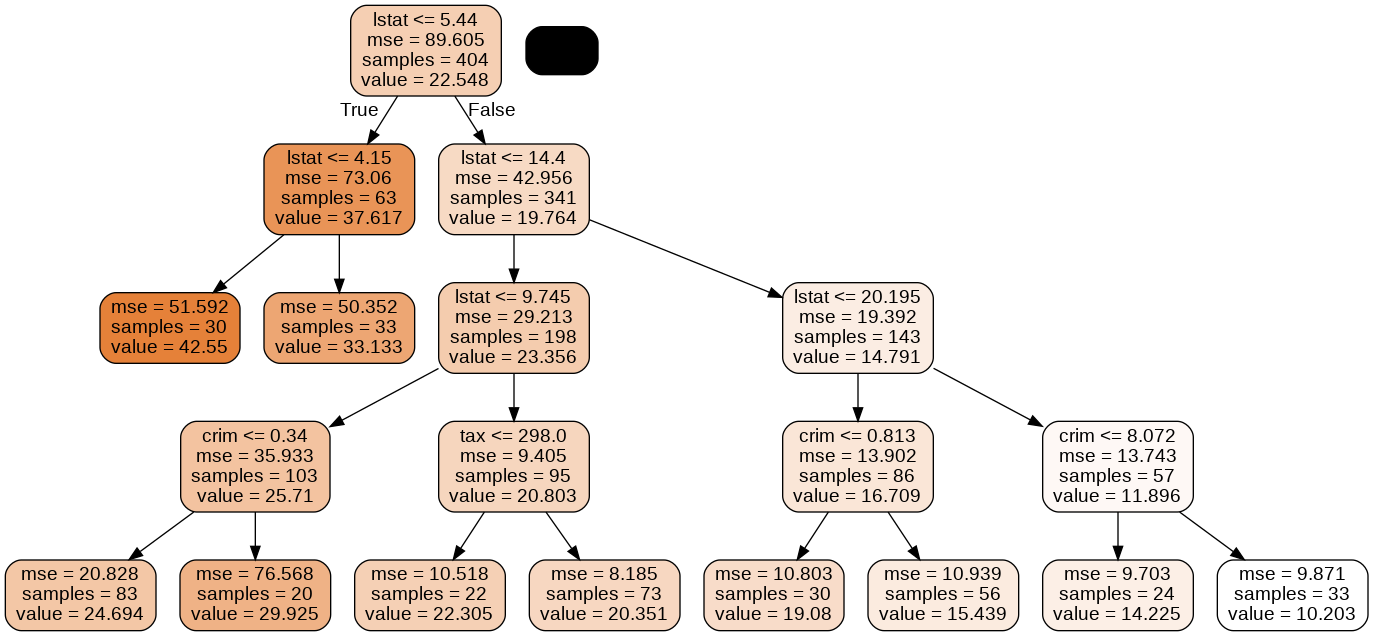

In [ ]:
Image(dt_graph_best.create_png())

### feature importance 파악하기

In [ ]:
# Feature Importance

import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=train_features.columns)

3.5.중요도값 순 상위 4개의 값을 feature_top4에 저장하시오

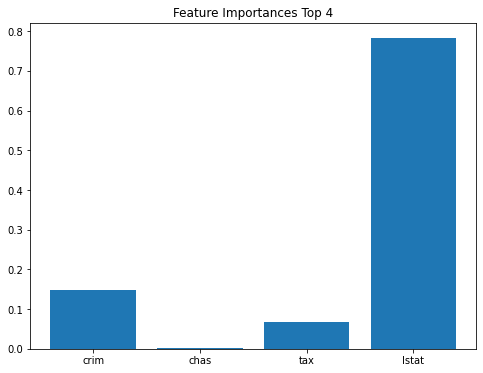

In [ ]:
import numpy as np
plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 4')
plt.xticks(np.arange(4), train_features)
plt.bar(np.arange(4), dt.feature_importances_)
plt.show()

In [ ]:
feature_importances.sort_values(ascending=False)

lstat    0.963905
crim     0.033740
tax      0.002355
chas     0.000000
dtype: float64

3.6.이를 통해 알 수 있는 의사결정나무의 장점을 설명하세요.

-> feature의 중요도를 쉽게 알 수 있다.